# Motivation
## First Scenario
* Casually, we observed some "statistical structure" in the data! 
    * These 2 neurons usually fire in synchrony!
    * The neuron fires a lot when we present right moving bars! And then it fires less spikes to leftward bars and vertical ones!
    * My mice seem to groom more after drinking, these 2 behaviors seem to happen consecutively a lot!
    * The LFP power in some band seems to ramp up throughout experiment! 

* But does that structure really exists? Or it's just variability + observer's confirmation bias?
* We want to describe it with some Index / Statistics / Score to summarize the effect to low (1) dimension. 
    * Unlike t-test, sometimes the null distribution (non-existing) is not easy to construct parametrically! 
* $\to$ Bootstrapping to test hypothesis (giving significance level)

> *Neuroscientists are notoriously good at inventing indices.....*

## Second Scenario

* We come up with some model to describe the phenomena! Neuron's firing rate as a function of stimuli location. $r=f(\theta)$ 
* We get some data, and estimate the model parameters through fitting!
* How well do I know about the parameter? What's the variability of the estimated parameters?
* $\to$ Bootstrapping for parameter estimation. (giving confidence interval)

![Cycle of Science](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/_images/cycle_of_science.png)


# Bootstrapping and Shuffling Test


## Confidence Interval vs Significance Level

* Confidence interval and Signifiance both represent some "robustness" of conclusion, i.e. how fragile it is. 

* Confidence Inverval applies to **parameter estimation** scenario, 
    * Cf. Homework 3, given a set of coin flipping results $X=[0,1,0,0,1,1,1,1,1,1]$, how can I know the bias $b$ of underlying coin?
    * What are the possible **biases** that can generate this data ? (Confidence Interval)
* "I estimate some underlying parameter $b$ from data $X$ (through model fitting), can I give a range of parameter that are all possible?" 

* Significance Level applies to **hypothesis testing** scenario 
    * Cf. Homework 3, given a set of coin flipping results $X=[0,1,0,0,1,1,1,1,1,1]$, the p value of this result if the coin is fair? 
    * p value is the probability of getting this number of heads (7) or more imblanced heads. 
* "How (un)likely that my data (or more extreme data) is geneated by the world, if it conform to an uninteresting (null) hypothesis? (like $b=0.5$)"

* The CI and significance are answering the same question in different manner!
    * Cf. Homework 3
    * If the 95% confidence interval estimation of bias (from $X$) is $b\in[.55,.65]$, then claiming "coin isn't fair" have less than 5% chance to be wrong. 
    * A fair coin have less than 5% chance of generating your data $X$, then claiming "coin isn't fair" is also justified.

## Why we care bootstrap?

* We already have t-test and ANOVA. 
* Both assume a Gaussian random variable model when generating your null distribution. 

* So we know the expected value ($t=0$ or $F=1$) and variability $t-distribution, F-distribution$, for statistics!
* So compute significance and CI are easy

* *What if we don't know the distribution of some statistics (e.g. placeness score for a neuron)?*
* *What if we don't know what to expect under null hypothesis?*

* *What if we cannot easily find a generative model for data (e.g. our `coin_flip` function)?*
    * So we cannot do millions of simulations like in Homework 3....
    * You don't want to redo experiments thousands of time as well!

## Boots trapping come to rescue!

**Bootstrap Procedure** for a statistics $\hat\theta$

* You get $n$ data points $X$ from experiments. You get one statistical estimate $\hat \theta(X)$
* Repeat $N$ times (like $1000000$):
    * Sample $n$ data with replacement from $X$, you get $X^{(i)}$
    * Compute your statistics on the resampled data $\hat \theta(X^{(i)})$
* Collect your resampled statistics, and plot the distribution $\{\hat \theta(X^{(1)}),\{\hat \theta(X^{(2)})....\}$
* Then you can estimate the variability of the statistics!

* The way of resmpling / shuffle is key!
* If you resample based on null hypothesis, then you are simulating the null hypothesis.  
    * e.g. Merging all the data from test group and control group

* If you resample based on working hypothesis / model, then you are simulating the working hypothesis
    * Resample data within each experiment condition.

# Bootstrap Works. (Can Converge Back to Analytical Estimates)

We want to know the mean of a distribution, and our confidence interval on that statistics

* Analytically we knoe standard error of the mean $ste=std/\sqrt{n}$
* Can we estimate that through bootstrapping?

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
np.random.choice?

In [4]:
data = np.array([4,4,5,7,7,8,9])

In [5]:
np.mean(data)

6.285714285714286

In [6]:
data_sem = np.std(data) / np.sqrt(len(data))

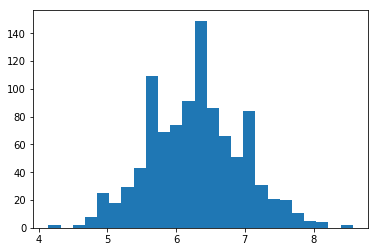

In [7]:
bstrp_num = 1000
bstrp_size = len(data)
bstrp_data = np.random.choice(data, size=(bstrp_num, 7), replace=True)
bstrp_means = np.mean(bstrp_data,axis=1)
plt.figure
plt.hist(bstrp_means,bins=25)
plt.show()

In [8]:
print("mean of bootstrap means %.3f, Computed mean %.3f" % (bstrp_means.mean(),np.mean(data)))
print("STD of bootstrap means %.3f, Computed SEM %.3f" % (bstrp_means.std(),data_sem))

mean of bootstrap means 6.286, Computed mean 6.286
STD of bootstrap means 0.686, Computed SEM 0.691


In [9]:
data_sem

0.6914724222896904

## What if you don't have a analytical formula for standard error?

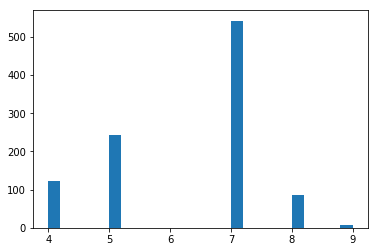

mean of bootstrap median 6.252, Computed median 7.000
STD of bootstrap median 1.275, Computed SEM 0.867


In [10]:
bstrp_num = 1000
bstrp_size = len(data)
bstrp_data = np.random.choice(data, size=(bstrp_num, 7), replace=True)
bstrp_median = np.median(bstrp_data,axis=1)
plt.figure
plt.hist(bstrp_median,bins=25)
plt.show()
print("mean of bootstrap median %.3f, Computed median %.3f" % (bstrp_median.mean(),np.median(data)))
print("STD of bootstrap median %.3f, Computed SEM %.3f" % (bstrp_median.std(),1.2533 * data_sem))

## Can you bootstrap the maximum value in a set?

## Can you bootstrap the 95% percentile from a 20 sample dataset?

### Cases when bootstrap can fail


* Too Small of a Sample Size
* Estimating Extreme Values
* Distributions with Infinite Moments

* https://stats.stackexchange.com/questions/9664/what-are-examples-where-a-naive-bootstrap-fails
* [Bootstrap Methods: A Guide for Practitioners and Researchers](https://www.amazon.com/dp/0471756210/) Chap 9, "When Bootstrapping Fails Along with Some Remedies for Failures,"

## Assumption underlying bootstrap

# How Well Can I Estimate Orientation Tuning Parameters?

We know neurons in visual cortex fires different firing rate towards different orientation of lines.

* Can we describe this relationship more quantitatively with some parameters?
* How wide is the tuning? How sharp is the tuning?

![](https://med.libretexts.org/@api/deki/files/7191/fig_v1_orientation_tuning_data.jpg?revision=1&size=bestfit&width=550&height=468)

> Sometimes neuroscientists need some functions that mathematicians have not developped analytical tools for....

[Von Mises Tuning curve](https://en.wikipedia.org/wiki/Von_Mises_distribution), 
### $$f(\theta\mid\mu,\kappa)={A\over 2\pi I_0(\kappa)}\exp(\kappa \cos(x-\mu))$$

![PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/VonMises_distribution_PDF.png/640px-VonMises_distribution_PDF.png)

## What does the tuning curve look like?

In [60]:
def vonMises(theta, A=1, mu=0, kappa=1):
    return A * np.exp(kappa * np.cos(theta-mu))

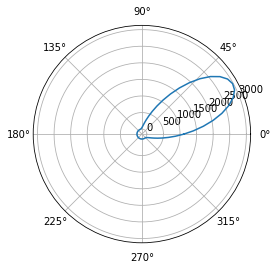

In [61]:
theta = np.linspace(0, 2*np.pi, 100, endpoint=True)
plt.polar(theta,vonMises(theta,mu=0.5,kappa=8))
plt.show()

## Let's generate some data! 

In [89]:
bin_num = 16
trial_num = 10
exp_theta = np.linspace(0, 2*np.pi, bin_num, endpoint=False)
print(exp_theta / np.pi *180)
tuning_ctr = 0
kappa = 1
mean_rsp = vonMises(exp_theta,A=10,mu=tuning_ctr,kappa=kappa)
fr_rsp = np.random.poisson(mean_rsp[:,np.newaxis], (bin_num, trial_num))

[  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5]


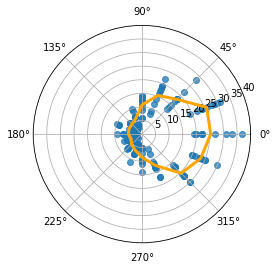

In [104]:
plt.figure()
ax = plt.subplot(111, polar=True)
c = plt.scatter(np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1), fr_rsp, )#c=colors, s=area, cmap=cm.hsv
ax.set_ylim(0,40)
c.set_alpha(0.75)
mean_rsp = fr_rsp.mean(axis=1)
idx = list(range(bin_num)) + [0] # use cyclic index to plot a circle.
ax.plot(exp_theta[idx], mean_rsp[idx], color="orange",lw=3)
plt.show()

In [90]:
np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908],
       [0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
        0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816],
       [1.17809725, 1.17809725, 1.17809725, 1.17809725, 1.17809725,
        1.17809725, 1.17809725, 1.17809725, 1.17809725, 1.17809725],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.96349541, 1.96349541, 1.96349541, 1.96349541, 1.96349541,
        1.96349541, 1.96349541, 1.96349541, 1.96349541, 1.96349541],
       [2.35619449, 2.35619449, 2.35619449, 2.35619449, 2.35619449,
        2.35619449, 2.35619449, 2.35619449, 2.35619449, 2.35619449],
       [2.74889357, 2.74889357, 2.7488935

In [87]:
fr_rsp

array([[28, 31, 30, 33, 22, 21, 24, 20, 39, 26],
       [28, 21, 19, 16, 23, 19, 17, 30, 20, 14],
       [ 9,  6, 11, 12, 15,  6,  7, 12,  6, 11],
       [ 6,  6,  8,  5,  4,  8,  4,  5,  4,  3],
       [ 3,  1,  2,  8,  2,  3,  4,  6,  2,  6],
       [ 8,  3,  2,  4,  3,  5,  3,  7,  9,  6],
       [15,  9,  8, 12, 10,  8,  9,  7, 14, 14],
       [21, 19, 16, 19, 24, 23, 23, 22, 26, 17]])

## We need to fit the data to estimate the parameter

In [109]:
mean_rsp

array([25.3, 25.8, 18.1, 15.4, 10.7,  6.1,  5.2,  5.1,  5. ,  4.3,  5.4,
        6.4,  8.5, 12.4, 20.4, 23.4])

In [105]:
from scipy.optimize import curve_fit

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [115]:
xdata = np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1).reshape(-1)
ydata = fr_rsp.reshape(-1)
curve_fit(vonMises, xdata, ydata, p0=[1,0,1])
#curve_fit(vonMises, exp_theta, mean_rsp, p0=[1,0,1])

(array([9.88618537, 0.04308534, 0.95785168]),
 array([[ 1.18237719e-01, -1.52878781e-09, -1.27070614e-02],
        [-1.52878781e-09,  1.01222906e-03,  1.61795988e-10],
        [-1.27070614e-02,  1.61795988e-10,  1.88070154e-03]]))

In [112]:
ydata.shape

(1, 160)

In [130]:
def resample_all(fr_rsp):
    return np.random.choice(fr_rsp.reshape(-1), size=fr_rsp.shape, replace=True)
    
def resample_trials(fr_rsp):
    new_trials = []
    for i in range(fr_rsp.shape[0]):
        frs = np.random.choice(fr_rsp[i, :], size=fr_rsp.shape[1], replace=True)
        new_trials.append(frs)
    return np.array(new_trials)
    

In [131]:
resample_trials(fr_rsp)

array([[31, 33, 31, 31, 33, 22, 22, 22, 22, 22],
       [31, 30, 24, 28, 24, 28, 28, 31, 28, 29],
       [18, 15, 13, 18, 18, 13, 18, 22, 18, 17],
       [22,  8, 17,  8, 14,  9, 19, 14, 17, 18],
       [11, 14, 13, 12,  6, 12, 14, 12,  6, 11],
       [ 4,  9,  7,  4,  7,  4, 10,  9,  3,  7],
       [ 5,  4,  4,  6,  6,  4,  6,  6,  6,  4],
       [ 4,  9,  3, 10,  2,  3,  9,  9,  4,  2],
       [ 3,  3,  3,  5,  3,  9,  3,  3,  3,  7],
       [ 7,  5,  2,  6,  6,  3,  6,  3,  3,  5],
       [ 4,  4,  7,  8,  4,  7,  8,  4,  7,  7],
       [11, 11,  4,  6,  8,  6,  6,  4,  4,  4],
       [ 9,  9, 10, 11, 11, 11,  5,  5,  9,  5],
       [ 8, 17, 11, 13, 11, 17, 17,  6, 12, 12],
       [17, 25, 22, 17, 22, 22, 22, 22, 17, 22],
       [21, 23, 21, 20, 23, 23, 20, 25, 24, 25]])

In [133]:
resample_all(fr_rsp)

array([[ 5, 11,  9,  5,  9,  9, 10,  6, 23,  6],
       [12, 25, 10,  7, 22, 21, 17, 17, 31,  5],
       [ 5, 17, 29,  4, 16,  3,  4,  4, 25,  6],
       [18, 19,  5,  2,  8,  7, 19, 10, 31,  4],
       [ 2, 22, 14,  4,  9,  9,  7, 20,  2,  3],
       [ 7, 22, 29,  8,  6, 25, 31, 24, 13,  5],
       [19,  3,  6,  3,  7,  2, 25,  7, 22,  4],
       [ 3,  6, 18,  3, 23,  8, 19,  3, 20,  5],
       [ 9,  6,  3, 20, 20, 23, 31,  4,  5,  4],
       [15,  7,  5, 11, 23,  3,  6, 25, 20, 19],
       [22, 11,  7,  7, 10, 16, 26, 19, 24, 23],
       [21,  6, 11,  4,  6, 22, 12,  4,  5, 14],
       [ 3, 25,  9,  8, 23, 12, 24, 13, 17, 30],
       [ 6,  5, 11, 25, 13, 13, 27, 19,  6, 12],
       [ 7,  5,  4,  9, 17, 28, 17,  6,  2,  6],
       [ 3,  6,  3, 22, 17,  6,  2,  8,  5, 22]])

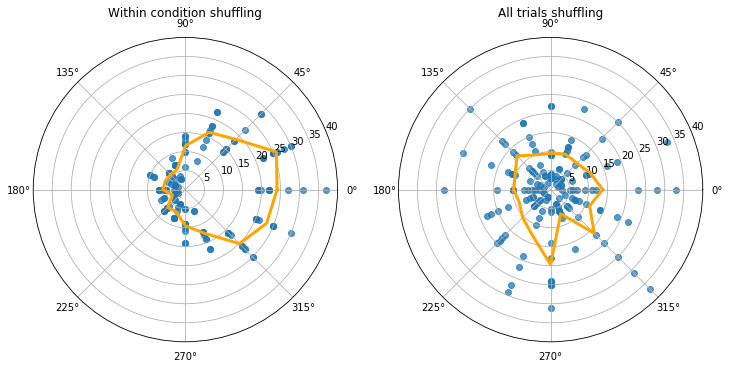

In [162]:
bstrp_fr = resample_trials(fr_rsp)
bstrp_null_fr = resample_all(fr_rsp)

plt.figure(figsize=[12,6])
ax = plt.subplot(121, polar=True)
c = plt.scatter(np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1), bstrp_fr, )#c=colors, s=area, cmap=cm.hsv
ax.set_ylim(0,40)
c.set_alpha(0.75)
mean_rsp = bstrp_fr.mean(axis=1)
idx = list(range(bin_num)) + [0] # use cyclic index to plot a circle.
ax.plot(exp_theta[idx], mean_rsp[idx], color="orange",lw=3)
ax.set_title("Within condition shuffling")
ax = plt.subplot(122, polar=True)
c = plt.scatter(np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1), bstrp_null_fr, )#c=colors, s=area, cmap=cm.hsv
ax.set_ylim(0,40)
c.set_alpha(0.75)
mean_rsp = bstrp_null_fr.mean(axis=1)
idx = list(range(bin_num)) + [0] # use cyclic index to plot a circle.
ax.plot(exp_theta[idx], mean_rsp[idx], color="orange",lw=3)
ax.set_title("All trials shuffling")
plt.show()

In [143]:
xdata = np.repeat(exp_theta[:,np.newaxis], trial_num, axis=1).reshape(-1)
param, _ = curve_fit(vonMises, xdata, bstrp_fr.reshape(-1), p0=[1,0,1])
param_null, _ = curve_fit(vonMises, xdata, bstrp_null_fr.reshape(-1), p0=[1,0,1])

In [144]:
param

array([9.86460557, 0.07899087, 1.02121318])

In [145]:
param_null

array([13.14460974,  3.77981297,  0.15475158])

In [164]:
rsmp_n = 10000
param_col = []
param_null_col = []
from time import time
t0 = time()
for rsmp_i in range(rsmp_n):
    bstrp_fr = resample_trials(fr_rsp)
    bstrp_null_fr = resample_all(fr_rsp)
    param, _ = curve_fit(vonMises, xdata, bstrp_fr.reshape(-1), p0=[1,0,1])
    param_null, _ = curve_fit(vonMises, xdata, bstrp_null_fr.reshape(-1), p0=[1,0,1])
    param_col.append(param)
    param_null_col.append(param_null)
print(time()-t0, " sec")
param_col = np.array(param_col)
param_null_col = np.array(param_null_col)

21.850672006607056  sec


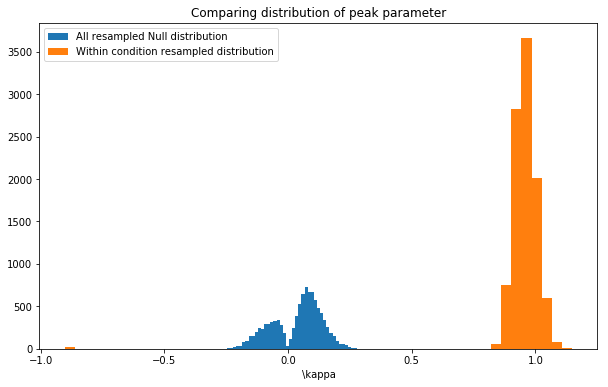

In [165]:
plt.figure(figsize=[10,6])
plt.hist(param_null_col[:,2],bins=50,label="All resampled Null distribution")
plt.hist(param_col[:,2],bins=50,label="Within condition resampled distribution")
plt.title("Comparing distribution of peak parameter")
plt.xlabel("\kappa")
plt.legend()
plt.show()

# Does my Place Cell Really Have "Placeness"?

Intuitively, placeness means the firing of Place cell $r(x)$ conveys information about the location $x$ of the subject. Neural system could be thought of as a noisy information channel, and one information theoretic measure of the channel capacity is the [Skaggs–McNaughton information index](http://papers.nips.cc/paper/671-an-information-theoretic-approach-to-deciphering-the-hippocampal-code.pdf) 

$$I = \sum_x r(x)\log_2{r(x)\over \bar r}p(x)$$

Let's test if this is true with some real spiking dataset!  

[Spatial encoding in primate hippocampus during free navigation](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3000546)

[Open Dataset on Datadryad](https://datadryad.org/stash/dataset/doi:10.5061/dryad.kk63d49)

In [89]:
import pickle
spikeTime = pickle.load(open("SpkTime_data.p", "rb"))
position = pickle.load(open("Pos_data.p", "rb"))

In [90]:
list(spikeTime.keys())

[(2, 0), (2, 1), (4, 0), (4, 1), (22, 0), (55, 0), (55, 1)]

In [91]:
list(position.keys())

['XPos', 'YPos', 'T']

## Load Matlab dataset in python
Here are the codes that I used to process the [Open Dataset on Datadryad](https://datadryad.org/stash/dataset/doi:10.5061/dryad.kk63d49) into python readable format. In case you are interested!

In [15]:
import h5py
import pickle
hpdata = h5py.File(r'E:\Datasets\Spatial_encoding_marmoset_hippo_Data_01_Final\Baloo_Track_01_180522_Data.mat')

In [84]:
list(hpdata['placeCellData'])
hpdata[hpdata[hpdata['placeCellData']['SpikeTimes'][0,0]][0,0]]
hpdata[hpdata['placeCellData']['ChannelNumber'][0,0]][0,0]

2.0

In [77]:
XPos = hpdata[hpdata['behavioralData'][0,0]]['XPosHist'][:]
YPos = hpdata[hpdata['behavioralData'][0,0]]['YPosHist'][:]
Time = hpdata[hpdata['behavioralData'][0,0]]['vidTime'][:]

In [87]:
spikeTime = {}
for ch_i in range(len(hpdata['placeCellData']['SpikeTimes'])):
    for unit in range(len(hpdata[hpdata['placeCellData']['SpikeTimes'][ch_i,0]])):
        chan_n = hpdata[hpdata['placeCellData']['ChannelNumber'][ch_i,0]][0,0]
        print("Chan %d-Unit %d"%(chan_n, unit), hpdata[hpdata[hpdata['placeCellData']['SpikeTimes'][ch_i,0]][unit,0]][:].shape)
        spikeTime[(int(chan_n), unit)] = hpdata[hpdata[hpdata['placeCellData']['SpikeTimes'][ch_i,0]][unit,0]][:]

Chan 2-Unit 0 (1, 3157)
Chan 2-Unit 1 (1, 523)
Chan 4-Unit 0 (1, 416)
Chan 4-Unit 1 (1, 544)
Chan 22-Unit 0 (1, 1589)
Chan 55-Unit 0 (1, 154)
Chan 55-Unit 1 (1, 2756)


In [88]:
pickle.dump(spikeTime, open("SpkTime_data.p", "wb"))
pickle.dump({"XPos":XPos, "YPos":YPos, "T":Time}, open("Pos_data.p", "wb"))

# Test The Neuron Firing Synchrony 

People have hypothesized that synchrony of neurons could "mean something", e.g. binding of features.

[Synchrony and the binding problem in macaque visual cortex](https://jov.arvojournals.org/article.aspx?articleid=2193657)

# Useful Tutorials of Bootstrap in Neuroscience and Biology

* https://courses.washington.edu/matlab1/Bootstrap_examples.html 
* http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/recitations/bootstrapping.html
* https://github.com/marcel-goldschen-ohm/CompNeuroSpring2019
    * https://github.com/marcel-goldschen-ohm/CompNeuroSpring2019/tree/master/lecture_05_mle_bootstrap